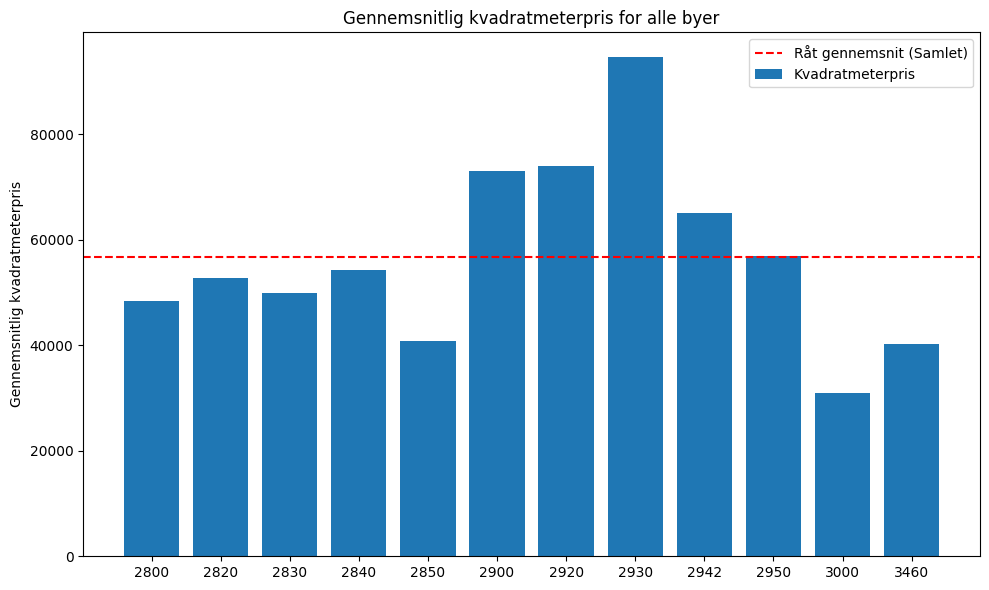

In [2]:
# Viser gennemsnits prisen for boliger opdelt på postnumre og gennemsnit for alle boligerne

import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV-files for all 12 cities
cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

# Calculate average squaremeter price for all 12 cities
avg_all_cities = []

for df in dataframes:
    average = df['Squaremeter price'].mean()
    avg_all_cities.append(average)

# Calculate raw average (does not take into account how many for sale in each city)
avg_raw = sum(avg_all_cities) / len(avg_all_cities)


# Plots
plt.figure(figsize=(10, 6))
plt.bar(cities, avg_all_cities, label='Kvadratmeterpris')
plt.axhline(y=avg_raw, color='red', linestyle='--', label='Råt gennemsnit (Samlet)')
plt.ylabel('Gennemsnitlig kvadratmeterpris')
plt.title('Gennemsnitlig kvadratmeterpris for alle byer')
plt.legend()

plt.tight_layout()
plt.show()


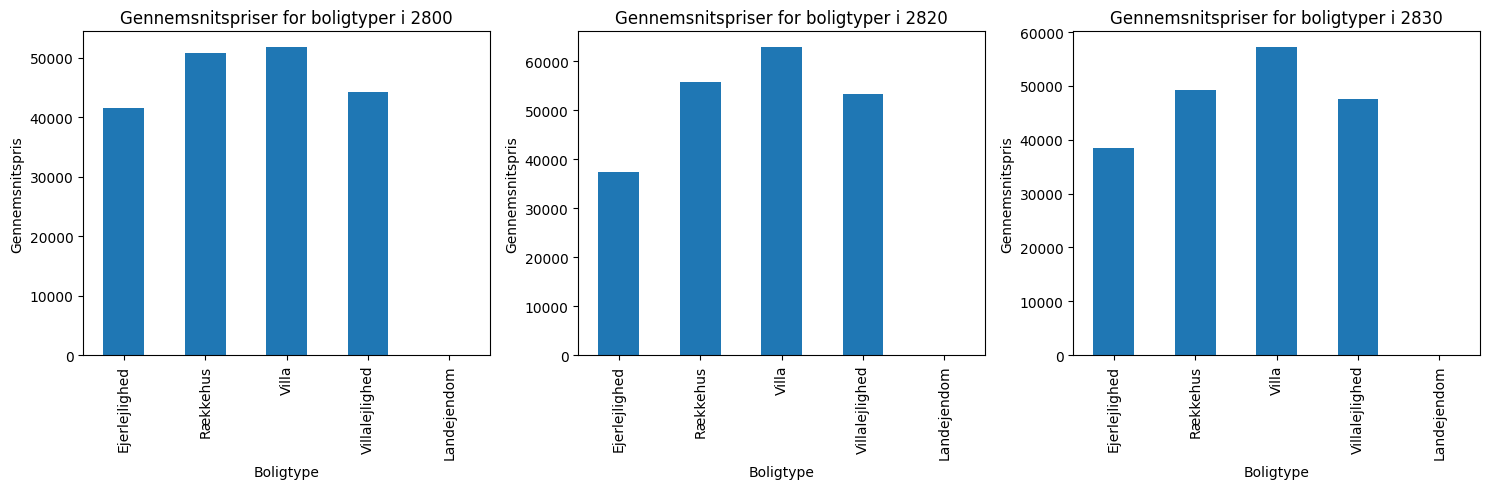

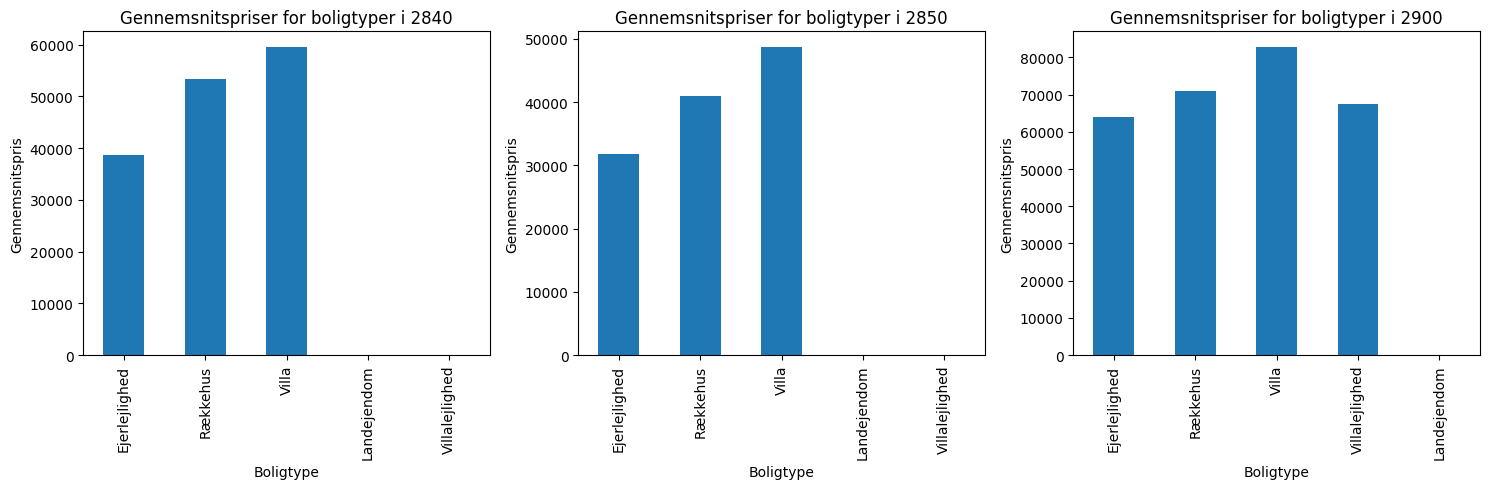

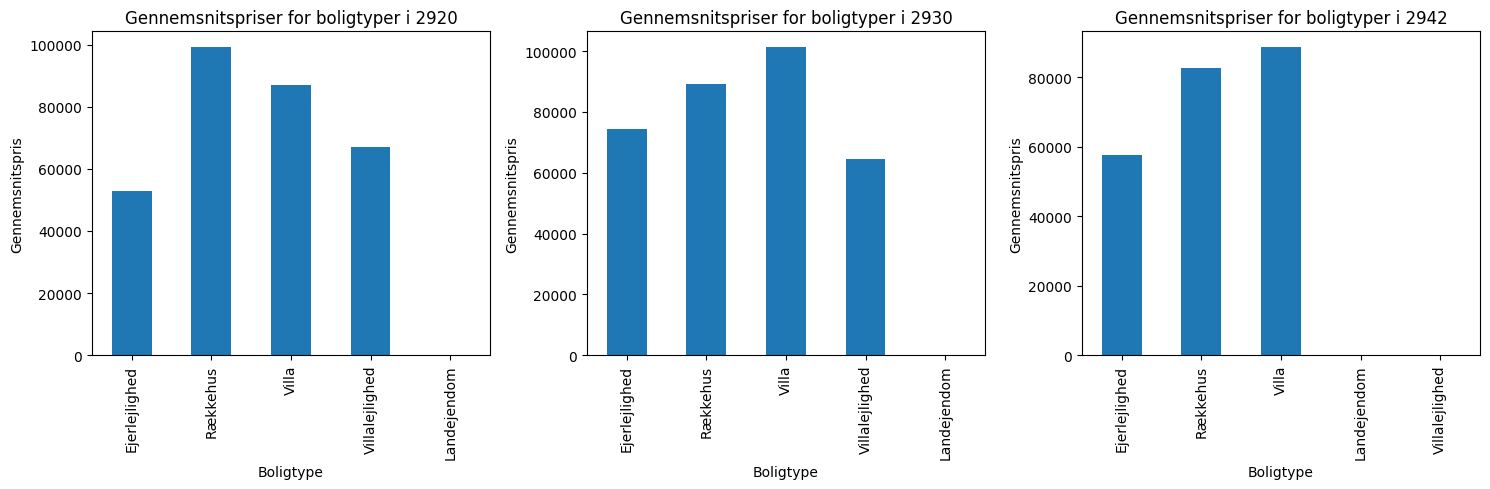

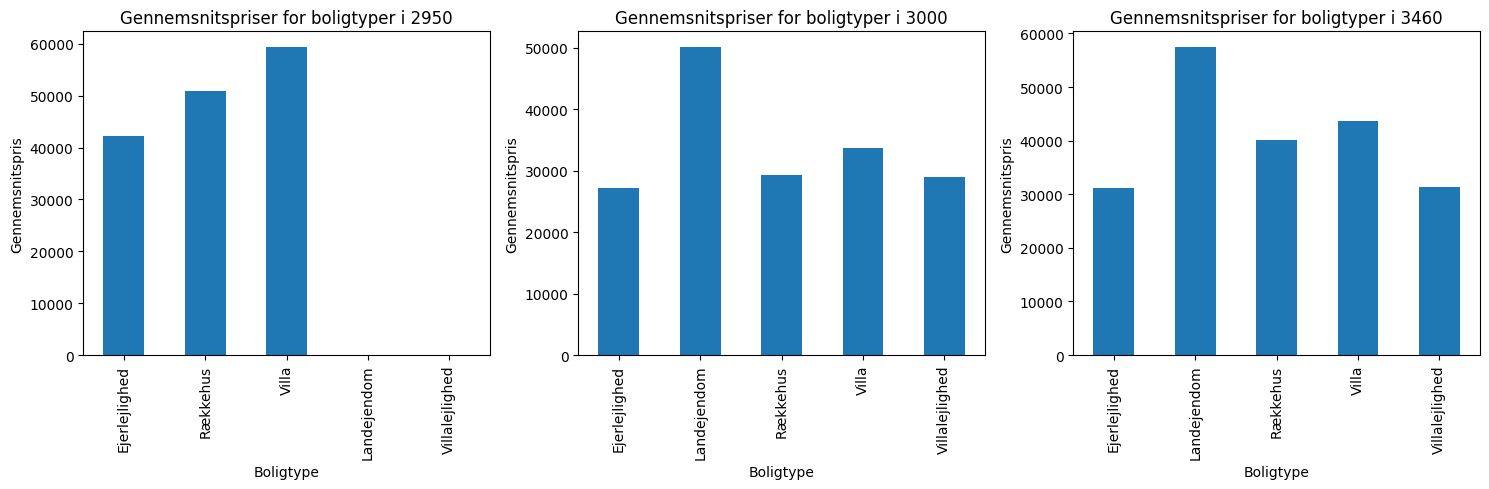

In [3]:
# Denne kode viser gennemsnitsprisen for forskellige boligtyper opdelt efter postnumre

import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV-files for all 12 cities
cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

# Calculate average squaremeter price for each city and type
averages = {}

# Set the number of plots per row
plots_per_row = 3

for i, (df, city) in enumerate(zip(dataframes, cities)):
    city_averages = df.groupby('Type')['Squaremeter price'].mean()
    all_types = ['Ejerlejlighed' ,'Landejendom','Rækkehus', 'Villalejlighed', 'Villa']  # Alle mulige typer
    
    # Loop gennem alle typer og tjek om de findes i city_averages
    for typ in all_types:
        if typ not in city_averages.index:
            # Hvis typen mangler, sæt gennemsnitsprisen til 0
            city_averages[typ] = 0
    
    
    # Opret en ny figur og akse for hver by
    if i % plots_per_row == 0:
        fig, axs = plt.subplots(nrows=1, ncols=plots_per_row, figsize=(15, 5))
    
    # Beregn række- og kolonneindeks for subplot
    row_index = i // plots_per_row
    col_index = i % plots_per_row
    
    # Lav et bar plot af gennemsnitspriserne
    city_averages.plot(kind='bar', ax=axs[col_index])
    
    # Tilføj titel og labels til plottet
    axs[col_index].set_title(f'Gennemsnitspriser for boligtyper i {city}')
    axs[col_index].set_xlabel('Boligtype')
    axs[col_index].set_ylabel('Gennemsnitspris')
    
    # Vis plottet for den aktuelle by
    if (i + 1) % plots_per_row == 0 or i == len(dataframes) - 1:
        plt.tight_layout()
        plt.show()


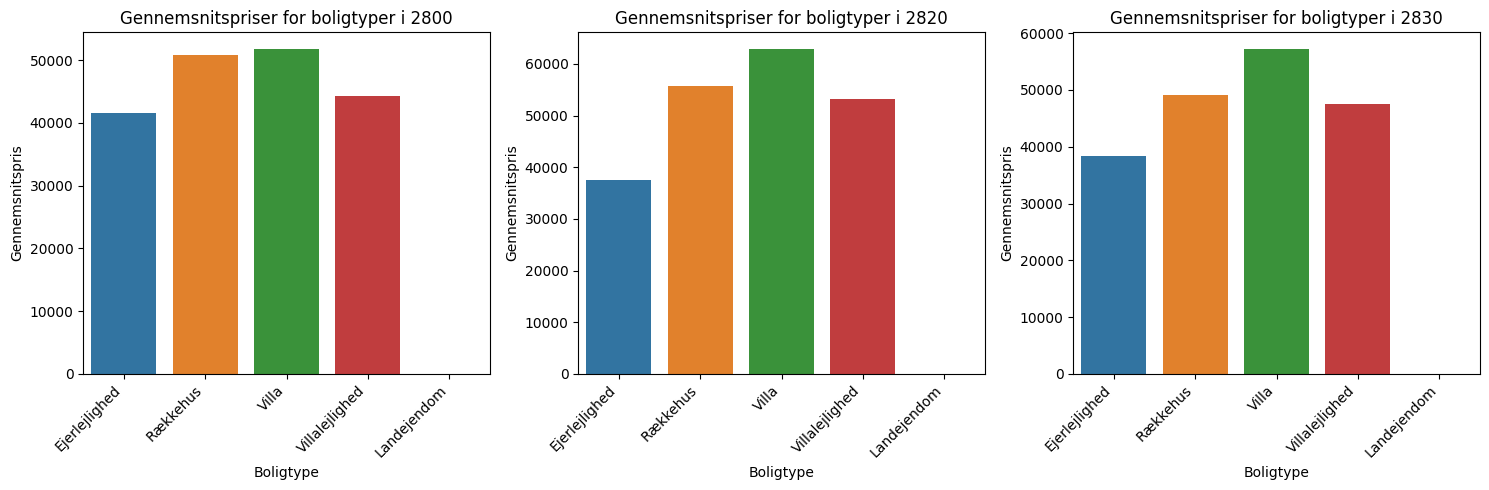

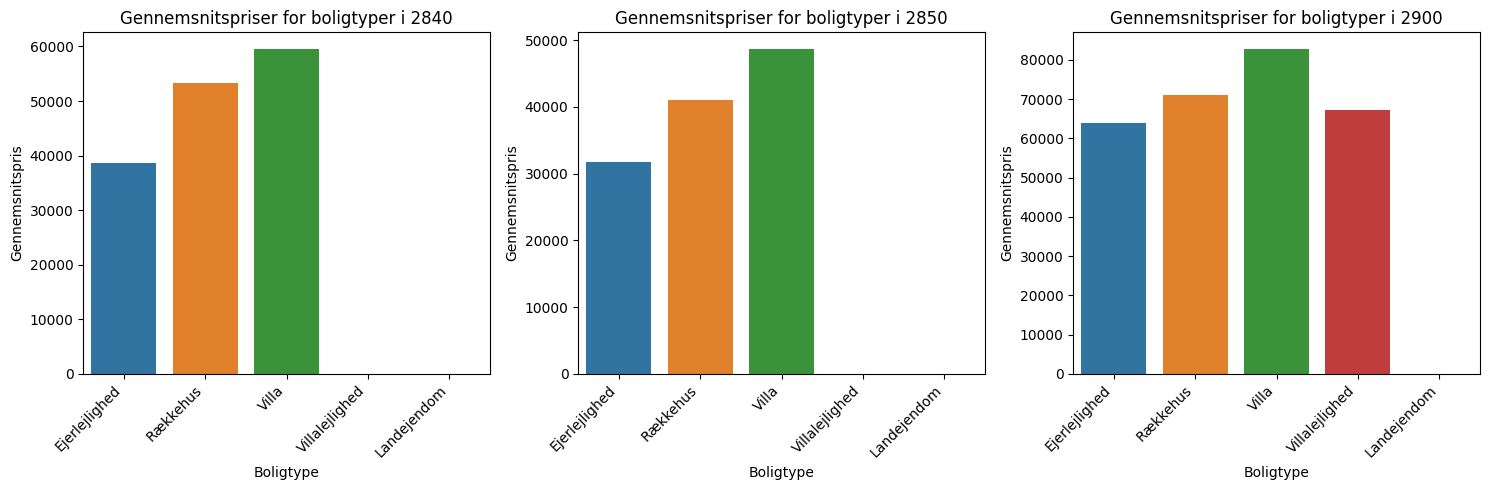

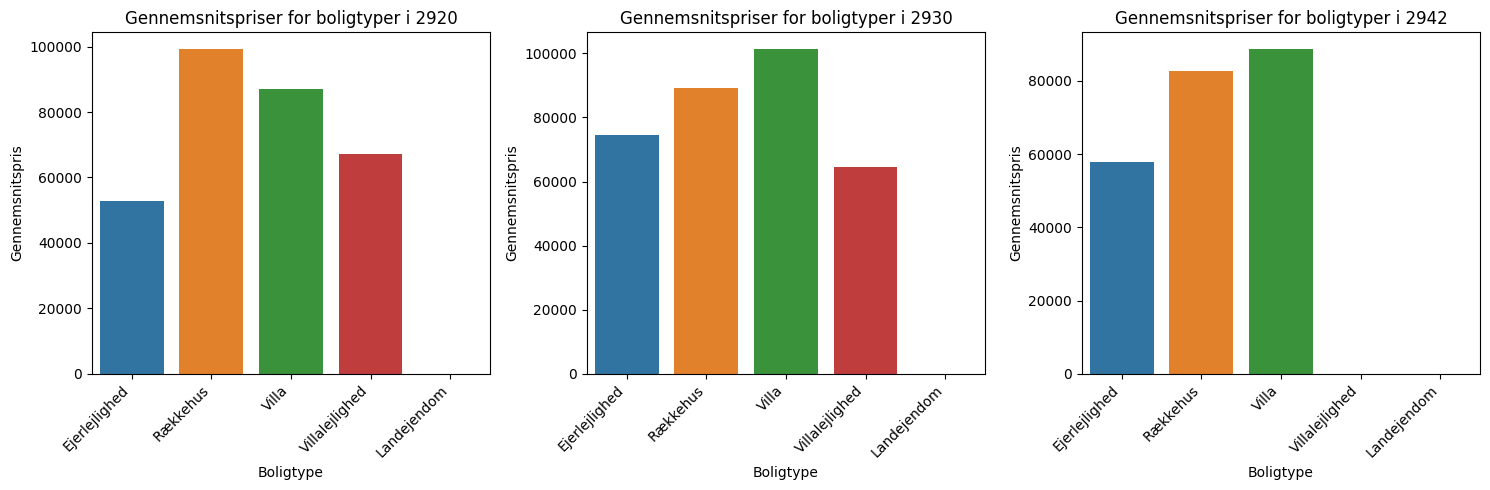

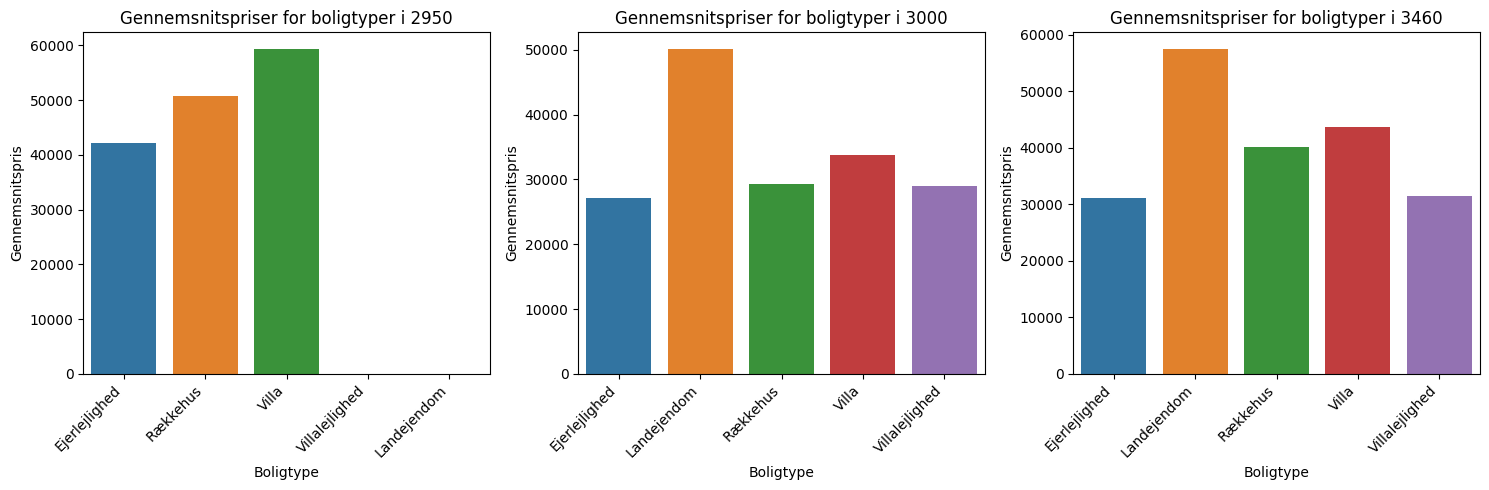

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from CSV-files for all 12 cities
cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

# Calculate average squaremeter price for each city and type
averages = {}

# Set the number of plots per row
plots_per_row = 3

for i, (df, city) in enumerate(zip(dataframes, cities)):
    city_averages = df.groupby('Type')['Squaremeter price'].mean()
    all_types = ['Ejerlejlighed', 'Rækkehus', 'Villalejlighed', 'Villa', 'Landejendom']  # Alle mulige typer
    
    # Loop through typer
    for typ in all_types:
        if typ not in city_averages.index:
            city_averages[typ] = 0
    

    # Create new figure and axix for each line of subplots
    if i % plots_per_row == 0:
        fig, axs = plt.subplots(nrows=1, ncols=plots_per_row, figsize=(15, 5))
    
    # Calculate row- and coloumnindex for subplot
    row_index = i // plots_per_row
    col_index = i % plots_per_row
    
    # Use Seaborn 
    sns.barplot(x=city_averages.index, y=city_averages.values, ax=axs[col_index])
    
    # Add title and labels to plot
    axs[col_index].set_title(f'Gennemsnitspriser for boligtyper i {city}')
    axs[col_index].set_xlabel('Boligtype')
    axs[col_index].set_ylabel('Gennemsnitspris')
    axs[col_index].set_xticklabels(axs[col_index].get_xticklabels(), rotation=45, ha='right')
    
    # Show plot for city
    if (i + 1) % plots_per_row == 0 or i == len(dataframes) - 1:
        plt.tight_layout()
        plt.show()


In [5]:
# Kombinere dataframes til en dataframe og fjerne NaN værdier

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']

dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)    

# Vis hele dataframe uden begrænsninger
pd.set_option("display.max_rows", None)  # Vis alle rækker

# Fjern rækker med NaN-værdier
combined_df = combined_df.dropna()

# Nulstil indekset i den opdaterede dataframe
combined_df = combined_df.reset_index(drop=True)



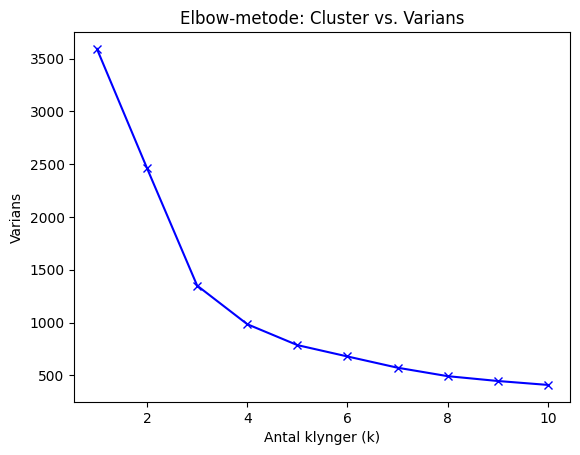

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']


dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)    

# Prepare your data
numerical_features = combined_df[['X', 'Y', 'Squaremeter price']]

# Standardize the numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Perform Spatial Clustering using K-means
k_values = range(1, 11)  # Defining the range of k values to evaluate
variances = []

# Calculate the variance for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(numerical_features_scaled)
    variances.append(kmeans.inertia_)

# Plot the cluster vs. variance graph
plt.plot(k_values, variances, 'bx-')
plt.xlabel('Antal klynger (k)')
plt.ylabel('Varians')
plt.title('Elbow-metode: Cluster vs. Varians')
plt.show()


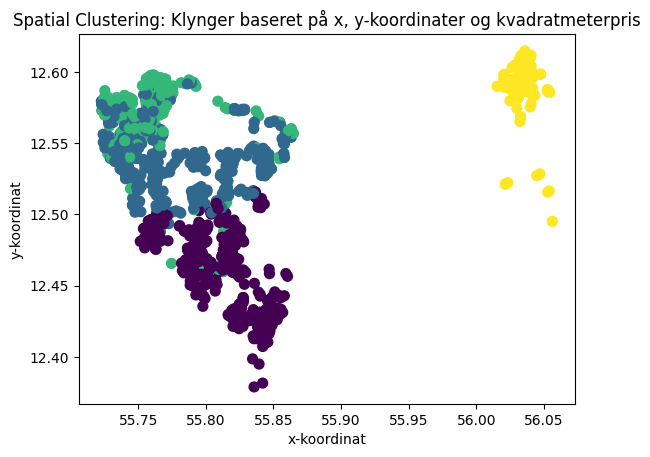

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']

dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)    

# Prepare your data
numerical_features = combined_df[['X', 'Y', 'Squaremeter price']]

# Standardize the numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Perform Spatial Clustering using K-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(numerical_features_scaled)

# Get the cluster assignments for each data point
cluster_labels = kmeans.predict(numerical_features_scaled)

# Add cluster labels as a new column in the dataframe
combined_df["Cluster"] = cluster_labels

# Visualize the clusters
plt.scatter(combined_df["X"], combined_df["Y"], c=combined_df["Cluster"], s=50)
plt.xlabel("x-koordinat")
plt.ylabel("y-koordinat")
plt.title("Spatial Clustering: Klynger baseret på x, y-koordinater og kvadratmeterpris")

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']

villa_df = combined_df[combined_df['Type'] == 'Villa']
raekkehus_df = combined_df[combined_df['Type'] == 'Rækkehus']
ejerlejlighed_df = combined_df[combined_df['Type'] == 'Ejerlejlighed']
villalejlighed_df = combined_df[combined_df['Type'] == 'Villalejlighed']

# Villa
villa_numerical_features = villa_df[['X', 'Y', 'Squaremeter price']]
villa_numerical_features_scaled = scaler.transform(villa_numerical_features)
villa_cluster_labels = kmeans.predict(villa_numerical_features_scaled)
villa_df.loc[:, "Cluster"] = villa_cluster_labels

# Rækkehus
raekkehus_numerical_features = raekkehus_df[['X', 'Y', 'Squaremeter price']]
raekkehus_numerical_features_scaled = scaler.transform(raekkehus_numerical_features)
raekkehus_cluster_labels = kmeans.predict(raekkehus_numerical_features_scaled)
raekkehus_df.loc[:, "Cluster"] = raekkehus_cluster_labels

# Ejerlejlighed
ejerlejlighed_numerical_features = ejerlejlighed_df[['X', 'Y', 'Squaremeter price']]
ejerlejlighed_numerical_features_scaled = scaler.transform(ejerlejlighed_numerical_features)
ejerlejlighed_cluster_labels = kmeans.predict(ejerlejlighed_numerical_features_scaled)
ejerlejlighed_df.loc[:, "Cluster"] = ejerlejlighed_cluster_labels

# Villalejlighed
villalejlighed_numerical_features = villalejlighed_df[['X', 'Y', 'Squaremeter price']]
villalejlighed_numerical_features_scaled = scaler.transform(villalejlighed_numerical_features)
villalejlighed_cluster_labels = kmeans.predict(villalejlighed_numerical_features_scaled)
villalejlighed_df.loc[:, "Cluster"] = villalejlighed_cluster_labels

# Villa
plt.scatter(villa_df["X"], villa_df["Y"], c=villa_df["Cluster"], s=50)
plt.xlabel("x-koordinat")
plt.ylabel("y-koordinat")
plt.title("Spatial Clustering: Klynger for Villa")
plt.show()

# Rækkehus
plt.scatter(raekkehus_df["X"], raekkehus_df["Y"], c=raekkehus_df["Cluster"], s=50, cmap='viridis')
plt.xlabel("x-koordinat")
plt.ylabel("y-koordinat")
plt.title("Spatial Clustering: Klynger for Rækkehus")
plt.show()

# Ejerlejlighed
plt.scatter(ejerlejlighed_df["X"], ejerlejlighed_df["Y"], c=ejerlejlighed_df["Cluster"], s=50, cmap='viridis')
plt.xlabel("x-koordinat")
plt.ylabel("y-koordinat")
plt.title("Spatial Clustering: Klynger for Ejerlejlighed")
plt.show()

# Villalejlighed
plt.scatter(villalejlighed_df["X"], villalejlighed_df["Y"], c=villalejlighed_df["Cluster"], s=50, cmap='viridis')
plt.xlabel("x-koordinat")
plt.ylabel("y-koordinat")
plt.title("Spatial Clustering: Klynger for Villalejlighed")
plt.show()



In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3460']

dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df['City'] = city  # Add a 'City' column with the zip code
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)  


from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3460']

dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df['City'] = city  # Add a 'City' column with the zip code
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

# Definér din kortlægningsfunktion
def map_energy_class(energy_class):
    if energy_class == 'A2020':
        return 10
    elif energy_class == 'A2015':
        return 9
    elif energy_class == 'A2010':
        return 8
    elif energy_class == 'A':
        return 7
    elif energy_class == 'B':
        return 6
    elif energy_class == 'C':
        return 5
    elif energy_class == 'D':
        return 4
    elif energy_class == 'E':
        return 3
    elif energy_class == 'F':
        return 2
    elif energy_class == 'G':
        return 1

# Anvend kortlægningsfunktionen på 'Energy class' kolonnen
combined_df['Energy class'] = combined_df['Energy class'].apply(map_energy_class)

# Vælg features og målvariabel
features = combined_df[['Energy class']]
target = combined_df['Price']

# Opdel dataene i træningssæt og testsæt
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=45)

# Træn lineær regression modellen
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluér modellen på testsættet
predictions = model.predict(X_test)

# Beregn R2-score og mean squared error (MSE)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print("R2-score:", r2)
print("Mean squared error:", mse)



R2-score: 0.004695309905267786
Mean squared error: 48858608512379.45


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3460']

dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df['City'] = city  # Add a 'City' column with the zip code
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

# Definér din kortlægningsfunktion for boligtypen
def map_type_class(type):
    if type == 'Villa':
        return 4
    elif type == 'Ejerlejlighed':
        return 3
    elif type == 'Rækkehus':
        return 2
    elif type == 'Villalejlighed':
        return 1
    else:
        return None  # or any default value

# Fjern rækker med boligtypen "Landejendom"
combined_df = combined_df[combined_df['Type'] != 'Landejendom']

# Anvend kortlægningsfunktionen på 'Type' kolonnen
combined_df['Type'] = combined_df['Type'].apply(map_type_class)


# Vælg features og målvariabel
features = combined_df[['Type']]
target = combined_df['Price']

combined_df 

# Opdel dataene i træningssæt og testsæt
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=45)

# Træn lineær regression modellen
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluér modellen på testsættet
predictions = model.predict(X_test)

# Beregn R2-score og mean squared error (MSE)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print("R2-score:", r2)
print("Mean squared error:", mse)


R2-score: 0.09782693779091545
Mean squared error: 32964436124637.36


In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3460']

dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df['City'] = city  # Add a 'City' column with the zip code
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

# Vælg features og målvariabel
features = combined_df[['City']]
target = combined_df['Price']

# Opdel dataene i træningssæt og testsæt
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=45)

# Træn lineær regression modellen
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluér modellen på testsættet
predictions = model.predict(X_test)

# Beregn R2-score og mean squared error (MSE)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print("R2-score:", r2)
print("Mean squared error:", mse)


R2-score: 1.2569307085263937e-05
Mean squared error: 49088480019997.734


In [11]:
# Vælg features og målvariabel
features = combined_df[['X', 'Y']]
target = combined_df['Price']

# Opdel dataene i træningssæt og testsæt
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=45)

# Træn lineær regression modellen
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluér modellen på testsættet
predictions = model.predict(X_test)

# Beregn R2-score og mean squared error (MSE)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print("R2-score:", r2)
print("Mean squared error:", mse)

R2-score: 0.04911352234677269
Mean squared error: 46678158571675.734


In [76]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3460']

dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df['City'] = city  # Add a 'City' column with the zip code
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

# Definér din kortlægningsfunktion for boligtypen
def map_type_class(type):
    if type == 'Villa':
        return 4
    elif type == 'Ejerlejlighed':
        return 3
    elif type == 'Rækkehus':
        return 2
    elif type == 'Villalejlighed':
        return 1
    else:
        return None  # or any default value
    
# Fjern rækker med boligtypen "Landejendom"
combined_df = combined_df[combined_df['Type'] != 'Landejendom']

# Anvend kortlægningsfunktionen på 'Type' kolonnen
combined_df['Type'] = combined_df['Type'].apply(map_type_class)

# Vælg features og målvariabel
features = combined_df[['Type']]
target = combined_df['Price']

# Opdel dataene i træningssæt og testsæt
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=45)

# Initialisér og træn lineær regression modellen
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Initialisér og træn decision tree modellen
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Initialisér og træn random forest modellen
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

# Initialisér og træn gradient boosting modellen
boosting_model = GradientBoostingRegressor()
boosting_model.fit(X_train, y_train)

# Evaluér lineær regression modellen
linear_predictions = linear_model.predict(X_test)
linear_r2 = r2_score(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)

# Evaluér decision tree modellen
tree_predictions = tree_model.predict(X_test)
tree_r2 = r2_score(y_test, tree_predictions)
tree_mse = mean_squared_error(y_test, tree_predictions)

# Evaluér random forest modellen
forest_predictions = forest_model.predict(X_test)
forest_r2 = r2_score(y_test, forest_predictions)
forest_mse = mean_squared_error(y_test, forest_predictions)

# Evaluér gradient boosting modellen
boosting_predictions = boosting_model.predict(X_test)
boosting_r2 = r2_score(y_test, boosting_predictions)
boosting_mse = mean_squared_error(y_test, boosting_predictions)

print("Linear Regression R2-score:", linear_r2)
print("Linear Regression Mean squared error:", linear_mse)

print("Decision Tree R2-score:", tree_r2)
print("Decision Tree Mean squared error:", tree_mse)

print("Random Forest R2-score:", forest_r2)
print("Random Forest Mean squared error:", forest_mse)

print("Gradient Boosting R2-score:", boosting_r2)
print("Gradient Boosting Mean squared error:", boosting_mse)




Linear Regression R2-score: 0.09782693779091545
Linear Regression Mean squared error: 32964436124637.36
Decision Tree R2-score: 0.249478774712509
Decision Tree Mean squared error: 27423240648078.99
Random Forest R2-score: 0.24973295044563348
Random Forest Mean squared error: 27413953339390.676
Gradient Boosting R2-score: 0.24948238833371494
Gradient Boosting Mean squared error: 27423108610235.684


In [74]:
# from sklearn.preprocessing import MinMaxScaler

# # Opret en MinMaxScaler-instans
# scaler = MinMaxScaler()

# # Antag at din DataFrame hedder "df" og har kolonnerne "X", "Y", "Type", "Size" og "Postnummer"

# # Konverter "Size" kolonnen fra streng til numerisk værdi
# df['Size'] = pd.to_numeric(df['Size'])

# # Konverter "Postnummer" kolonnen fra streng til numerisk værdi
# df['City'] = pd.to_numeric(df['City'])

# # Normalisér kolonnerne "X" og "Y"
# df[['X', 'Y']] = scaler.fit_transform(df[['X', 'Y']])

# # Normalisér kolonnen "Size"
# df['Size'] = (df['Size'] - df['Size'].min()) / (df['Size'].max() - df['Size'].min())

# # Normalisér kolonnen "Postnummer"
# df['City'] = (df['City'] - df['City'].min()) / (df['City'].max() - df['City'].min())

# # Træn din model på den normaliserede DataFrame


# # Træn din model på den normaliserede DataFrame


# # Vælg features og målvariabel
# features = combined_df[['X', 'Y', 'Type', 'Size', 'City']]
# target = combined_df['Price']

# # Konverter kategoriske features til numeriske værdier
# label_encoder = LabelEncoder()
# features['City'] = label_encoder.fit_transform(features['City'])

# # Opdel dataene i træningssæt og testsæt
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=45)



# # Initialisér og træn Gradient Boosting Regression modellen
# model = GradientBoostingRegressor()
# model.fit(X_train, y_train)

# # Forudsig prisen på boligen
# predictions = model.predict(X_test)

# # Evaluér modellen
# r2 = r2_score(y_test, predictions)
# mse = mean_squared_error(y_test, predictions)

# print("R2-score:", r2)
# print("Mean squared error:", mse)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Vælg features og målvariabel
features = combined_df[['X', 'Y', 'Type', 'Size', 'City']]
target = combined_df['Price']

# Konverter kategoriske features til numeriske værdier
label_encoder = LabelEncoder()
features['City'] = label_encoder.fit_transform(features['City'])

# Opdel dataene i træningssæt og testsæt
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=45)

# Definér hyperparametre, du vil søge igennem
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialisér Gradient Boosting Regression-modellen
model = GradientBoostingRegressor()

# Opret en GridSearchCV-instans med modellen og parametrene
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)

# Udfør grid search på træningssættet
grid_search.fit(X_train, y_train)

# Få de bedste fundne hyperparametre
best_params = grid_search.best_params_

# Brug de bedste hyperparametre til at initialisere modellen
best_model = GradientBoostingRegressor(**best_params)

# Træn modellen på hele træningssættet med de bedste hyperparametre
best_model.fit(X_train, y_train)

# Forudsig prisen på boligen
predictions = best_model.predict(X_test)

# Evaluér modellen
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print("Beste hyperparametre:", best_params)
print("R2-score:", r2)
print("Mean squared error:", mse)





/var/folders/st/2x6tdk056wxcpz57kyhqzwwh0000gn/T/ipykernel_93733/3651879377.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['City'] = label_encoder.fit_transform(features['City'])


RMSE (1.0, 5)
Beste hyperparametre: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
R2-score: 0.7547252759042996
Mean squared error: 8962075364612.178


In [75]:
#Vintappervej 16 55.763259,12.51509,5500000,Villa,149,36912,C Forudset pris: 7953030
#Hjortekærbakken 30,55.799086,12.539325,6495000,Villa,107,60700,G Forudset pris: Forudset pris: 6328837
#"Mølleåparken 15, 1. tv",55.795233,12.503967,3800000,Ejerlejlighed 81 3829112
#Fuglevadsvej 20,55.781487,12.500922,7700000,Villa,130 Forudset pris: 7369990
#Nymøllevej 43,55.800777,12.515891,8995000,Villa,163 Forudset pris: 8150372
#Christian X's Alle 108,55.764696,12.499532,11495000,Villa,186 Forudset pris: 10300725
#Christiansholms Tværvej 14,55.773883,12.58572,27800000,Villa,270 Forudset pris: 26532131
#Keilstruplund 16,55.84022,12.443929,4995000,Rækkehus,132,37840,C Forudset pris: 5298244
#øgebakken 3,55.827705,12.441655,6195000,Villa,114 Forudset pris: 5040238
#Birkebakken 39,55.825987,12.437059,7995000,Villa,240 Forudset pris: 8536721



# Indsamle data for den specifikke bolig
new_data = {
    'X': 55.757992,
    'Y': 12.581189,
    'Type': 'Villa',
    'Size': 190,
    'City': '2920'
}

# Opret en DataFrame med den nye boligdata
new_df = pd.DataFrame([new_data])

# Anvend kortlægningsfunktioner og konverter kategoriske features
new_df['Type'] = new_df['Type'].apply(map_type_class)
new_df['City'] = label_encoder.transform(new_df['City'])

# Forudsig prisen på den nye bolig
prediction = int(best_model.predict(new_df))

print("Forudset pris:", prediction)





Forudset pris: 15164580
